In [24]:
# Import thư viện
import pandas as pd

# Đọc file CSV
df = pd.read_csv('Week4_1_data.csv')

# Hiển thị 5 dòng đầu tiên
df.head()

# Hiển thị thông tin cơ bản về dataset
df.info()

# Hiển thị thống kê mô tả
df.describe()

# Hiển thị tên các cột
print("Các cột trong dataset:")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        499 non-null    int64  
 1   year_of_birth      499 non-null    int64  
 2   educational_level  499 non-null    object 
 3   marital_status     499 non-null    object 
 4   annual_income      486 non-null    float64
 5   purhcase_date      499 non-null    object 
 6   recency            499 non-null    int64  
 7   online_purchases   499 non-null    int64  
 8   store_purchases    499 non-null    int64  
 9   complaints         499 non-null    int64  
 10  calls              499 non-null    int64  
 11  intercoms          499 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 46.9+ KB
Các cột trong dataset:
Index(['customer_id', 'year_of_birth', 'educational_level', 'marital_status',
       'annual_income', 'purhcase_date', 'recency', 'online


Task 1 - Thống kê theo học vấn:
educational_level
Graduation     257
PhD            114
Master          81
High School     40
Basic            7
Name: count, dtype: int64

Task 2 - Top 20 khách hàng thu nhập cao nhất:
     customer_id educational_level  annual_income
164     20201865               PhD       157243.0
252     20201953        Graduation       102692.0
203     20201904               PhD       102160.0
124     20201825        Graduation       101970.0
424     20202125               PhD        93027.0
426     20202127        Graduation        92910.0
140     20201841            Master        92859.0
418     20202119        Graduation        91065.0
116     20201817        Graduation        90765.0
456     20202157       High School        89572.0
109     20201810            Master        89058.0
67      20201768       High School        88194.0
120     20201821            Master        88193.0
198     20201899        Graduation        86718.0
407     20202108               

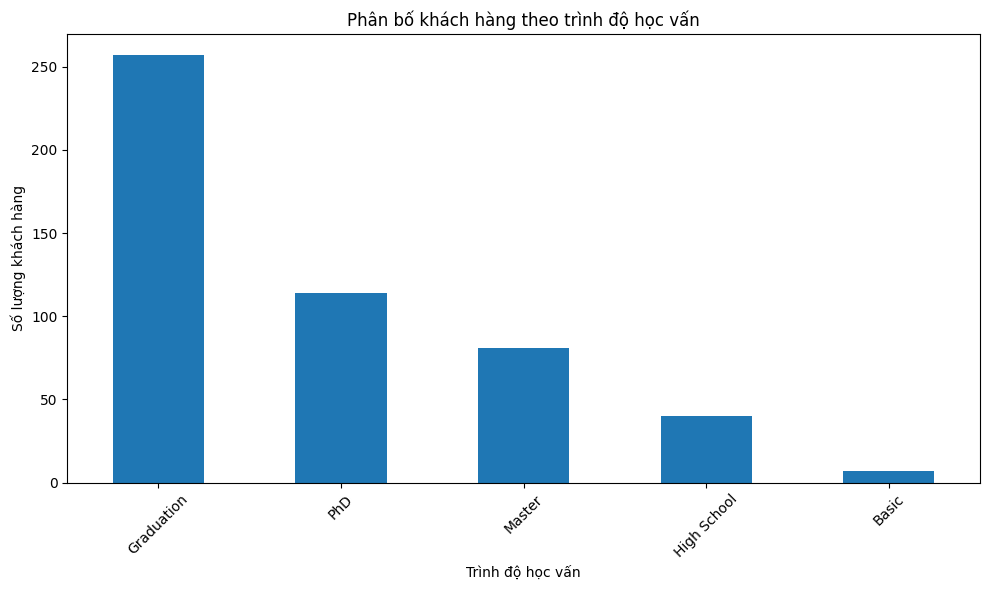

<Figure size 1000x600 with 0 Axes>

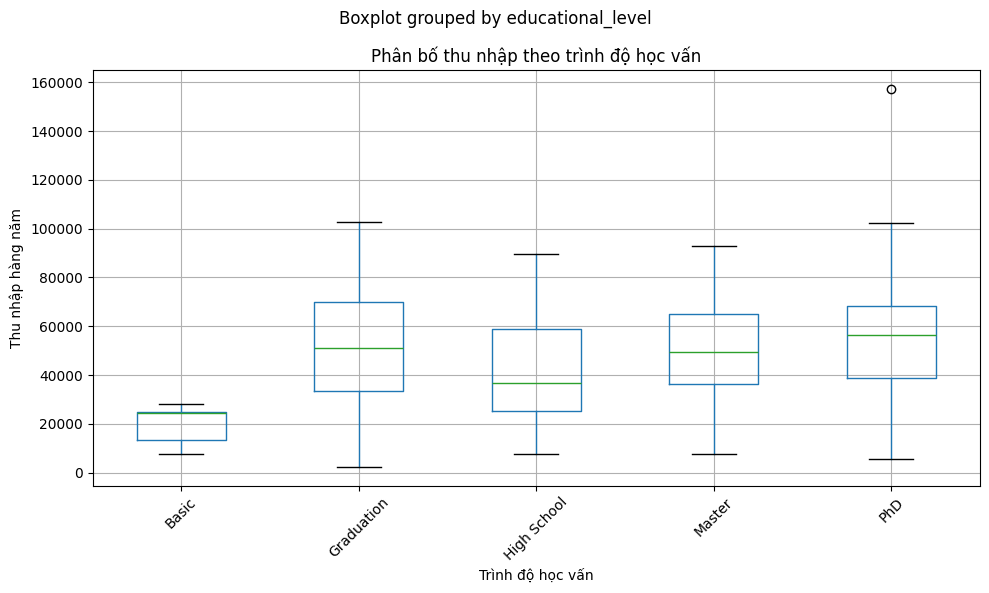

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customer_data(df):
    """
    Phân tích dữ liệu khách hàng theo các yêu cầu
    
    Parameters:
    df (pandas.DataFrame): DataFrame chứa dữ liệu khách hàng
    """
    # Task 1: Thống kê số lượng khách hàng theo học vấn
    education_stats = df['educational_level'].value_counts()
    print("\nTask 1 - Thống kê theo học vấn:")
    print(education_stats)
    
    # Tạo biểu đồ cho Task 1
    plt.figure(figsize=(10, 6))
    education_stats.plot(kind='bar')
    plt.title('Phân bố khách hàng theo trình độ học vấn')
    plt.xlabel('Trình độ học vấn')
    plt.ylabel('Số lượng khách hàng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Task 2: 20 khách hàng có thu nhập cao nhất
    top_income = df.nlargest(20, 'annual_income')[['customer_id', 'educational_level', 'annual_income']]
    print("\nTask 2 - Top 20 khách hàng thu nhập cao nhất:")
    print(top_income)
    
    # Task 3: Khách hàng sinh sau 1960 và thu nhập trên $50,000
    condition_3 = (df['year_of_birth'] > 1960) & (df['annual_income'] > 50000)
    result_3 = df[condition_3][['customer_id', 'year_of_birth', 'annual_income', 'educational_level']]
    print("\nTask 3 - Khách hàng sinh sau 1960 và thu nhập > $50,000:")
    print(result_3)
    
    # Task 4: Kết hợp điều kiện Task 2 & 3
    result_4 = result_3.nlargest(20, 'annual_income')
    print("\nTask 4 - Top 20 trong số khách hàng thỏa mãn điều kiện Task 3:")
    print(result_4)
    
    # Task 5: Khách hàng đã kết hôn hoặc ly hôn
    condition_5 = df['marital_status'].isin(['Married', 'Divorced'])
    result_5 = df[condition_5][['customer_id', 'marital_status', 'annual_income']]
    print("\nTask 5 - Khách hàng đã kết hôn hoặc ly hôn:")
    print(result_5)
    
    # Task 6: Thu nhập trung bình theo học vấn
    avg_income_by_edu = df.groupby('educational_level')['annual_income'].agg(['mean', 'count', 'std']).round(2)
    print("\nTask 6 - Thu nhập trung bình theo học vấn:")
    print(avg_income_by_edu)
    
    # Tạo biểu đồ cho Task 6
    plt.figure(figsize=(10, 6))
    df.boxplot(column='annual_income', by='educational_level', figsize=(10, 6))
    plt.title('Phân bố thu nhập theo trình độ học vấn')
    plt.xlabel('Trình độ học vấn')
    plt.ylabel('Thu nhập hàng năm')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Task 7: Thu nhập trung bình theo học vấn + tình trạng hôn nhân
    avg_income_by_edu_marital = df.groupby(['educational_level', 'marital_status'])['annual_income'].agg(['mean', 'count']).round(2)
    print("\nTask 7 - Thu nhập trung bình theo học vấn và tình trạng hôn nhân:")
    print(avg_income_by_edu_marital)
    
    return {
        'education_stats': education_stats,
        'avg_income_by_edu': avg_income_by_edu,
        'avg_income_by_edu_marital': avg_income_by_edu_marital
    }

# Đọc dữ liệu
df = pd.read_csv('Week4_1_data.csv')

# Chạy phân tích
results = analyze_customer_data(df)

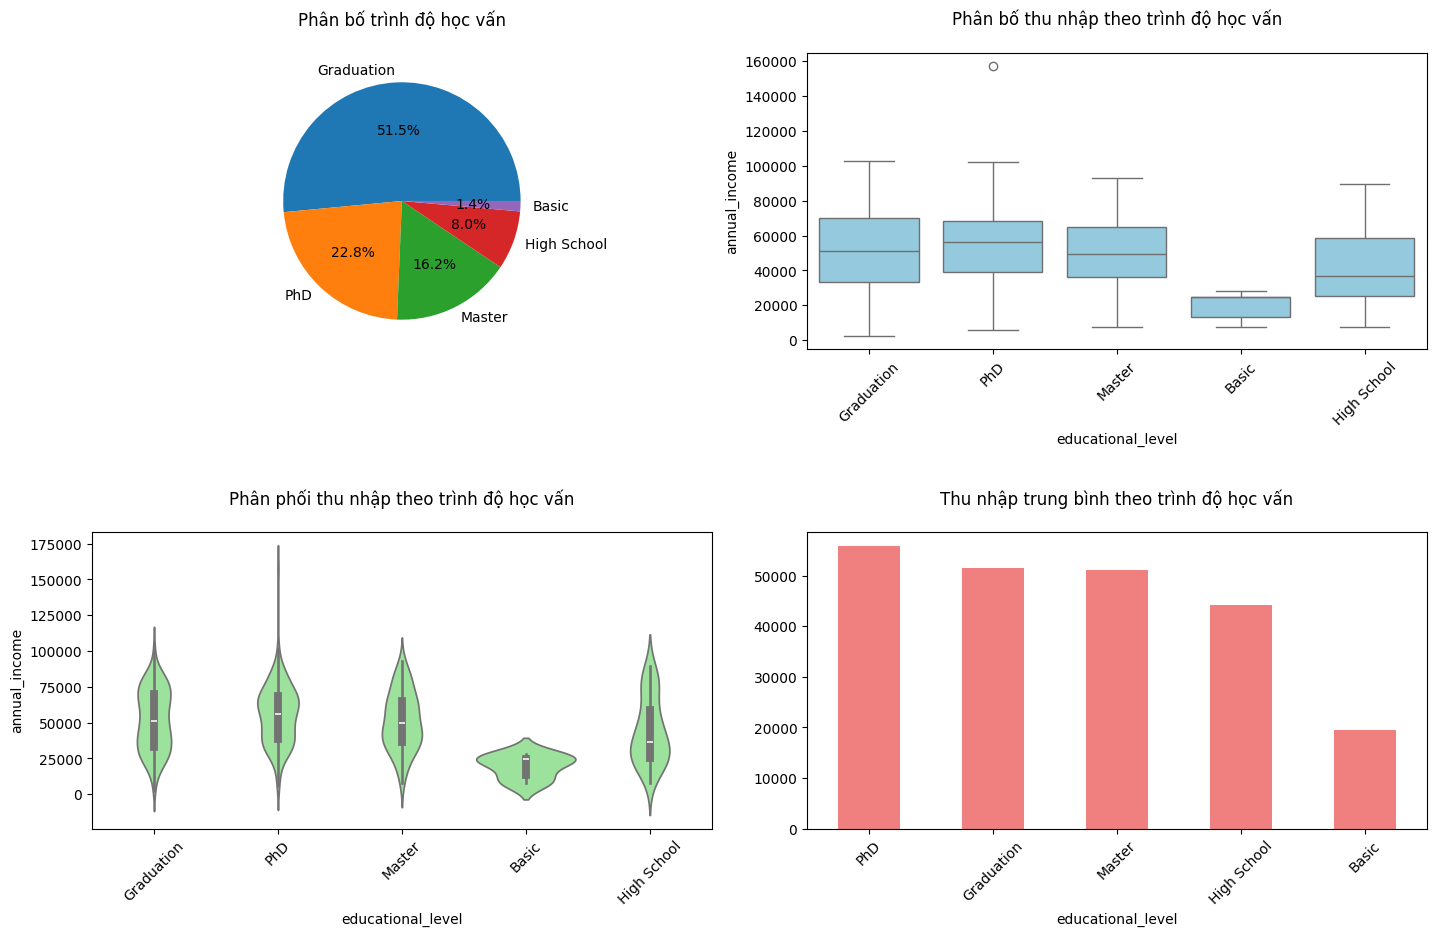

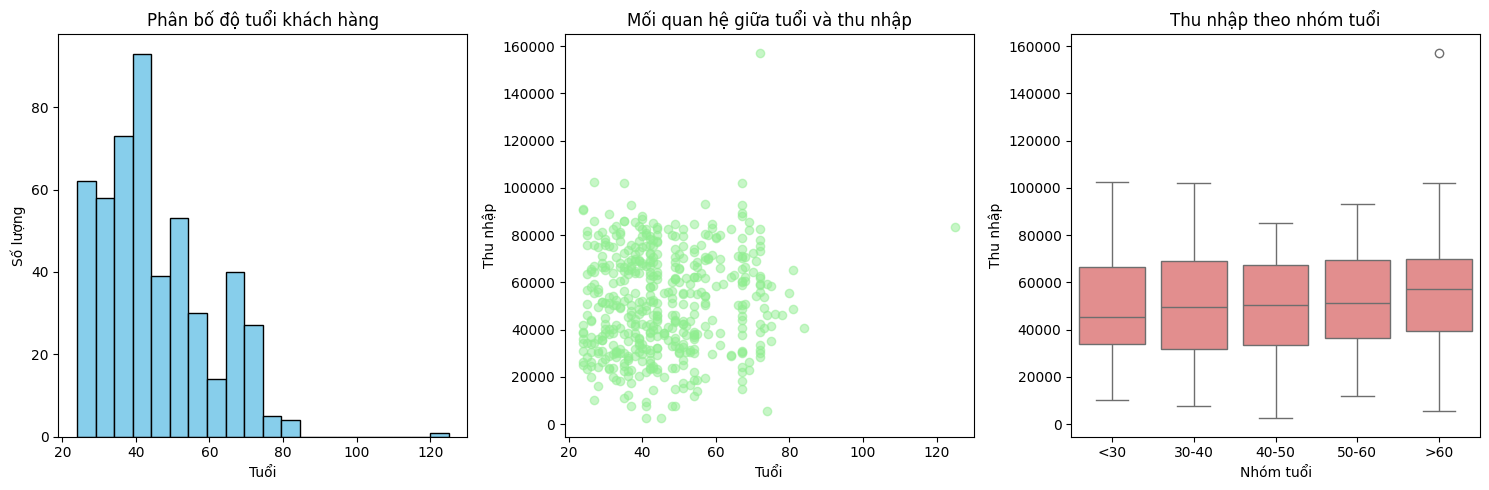

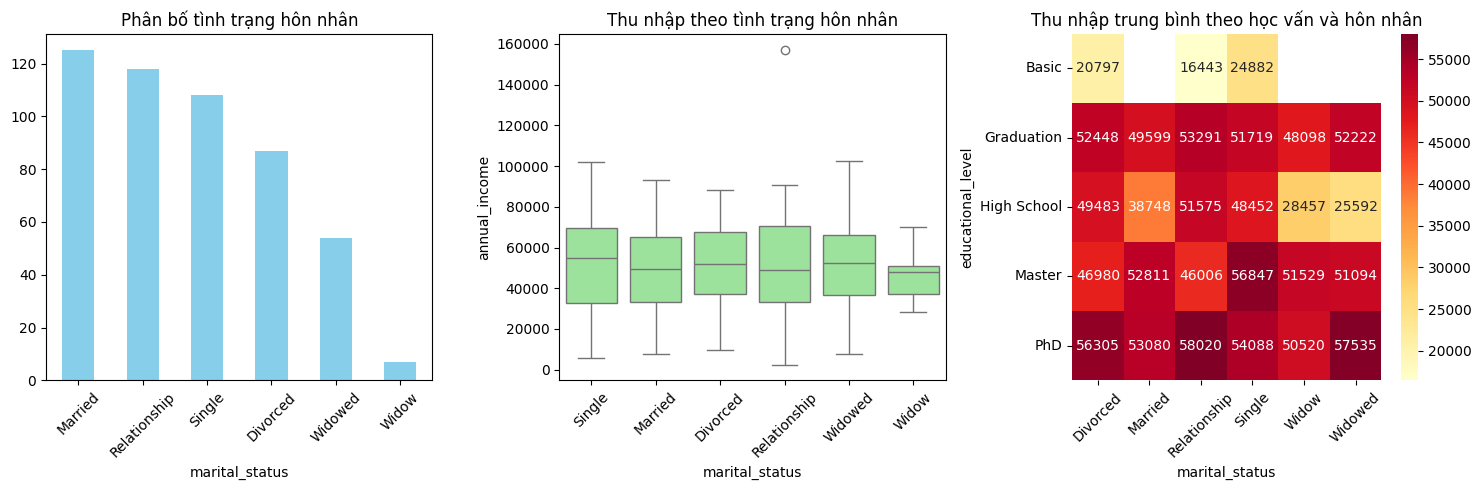

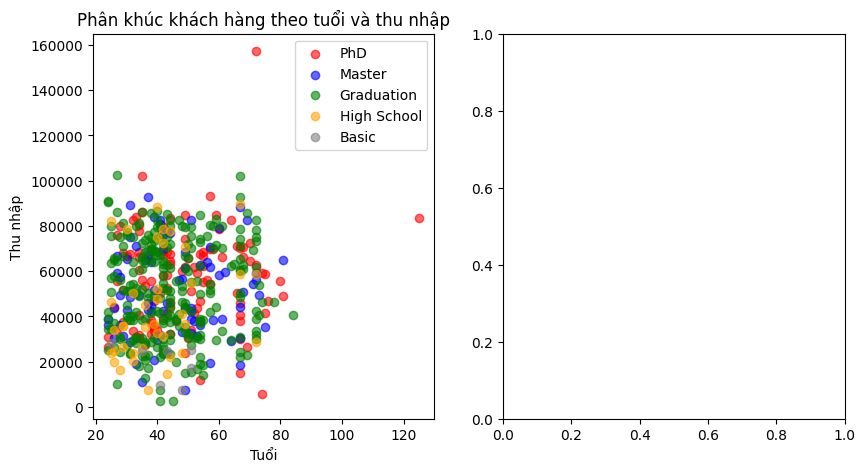

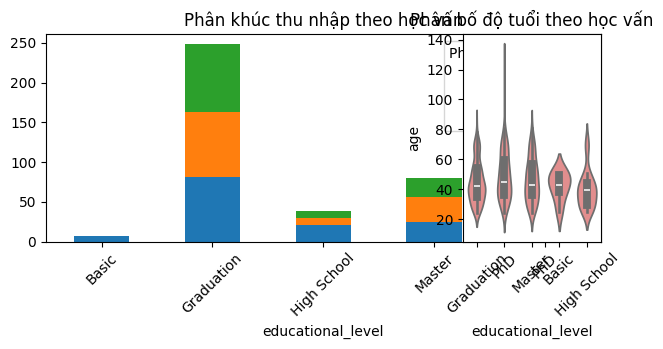

In [29]:
#Task 8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_customer_segments(df):
    """
    Tạo biểu đồ trực quan hóa phân khúc khách hàng
    """
    # 1. Phân bố học vấn và thu nhập
    fig = plt.figure(figsize=(15, 10))
    
    # 1.1 Pie chart cho phân bố học vấn
    plt.subplot(2, 2, 1)
    education_counts = df['educational_level'].value_counts()
    plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
    plt.title('Phân bố trình độ học vấn', pad=20)
    
    # 1.2 Box plot thu nhập theo học vấn
    plt.subplot(2, 2, 2)
    sns.boxplot(x='educational_level', y='annual_income', data=df, color='skyblue')
    plt.xticks(rotation=45)
    plt.title('Phân bố thu nhập theo trình độ học vấn', pad=20)
    
    # 1.3 Violin plot thu nhập theo học vấn
    plt.subplot(2, 2, 3)
    sns.violinplot(x='educational_level', y='annual_income', data=df, color='lightgreen')
    plt.xticks(rotation=45)
    plt.title('Phân phối thu nhập theo trình độ học vấn', pad=20)
    
    # 1.4 Bar plot thu nhập trung bình theo học vấn
    plt.subplot(2, 2, 4)
    avg_income = df.groupby('educational_level')['annual_income'].mean().sort_values(ascending=False)
    avg_income.plot(kind='bar', color='lightcoral')
    plt.title('Thu nhập trung bình theo trình độ học vấn', pad=20)
    plt.xticks(rotation=45)
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
    # 2. Phân tích theo độ tuổi
    plt.figure(figsize=(15, 5))
    
    # 2.1 Histogram phân bố độ tuổi
    plt.subplot(1, 3, 1)
    df['age'] = 2024 - df['year_of_birth']
    plt.hist(df['age'], bins=20, edgecolor='black', color='skyblue')
    plt.title('Phân bố độ tuổi khách hàng')
    plt.xlabel('Tuổi')
    plt.ylabel('Số lượng')
    
    # 2.2 Scatter plot tuổi và thu nhập
    plt.subplot(1, 3, 2)
    plt.scatter(df['age'], df['annual_income'], alpha=0.5, color='lightgreen')
    plt.title('Mối quan hệ giữa tuổi và thu nhập')
    plt.xlabel('Tuổi')
    plt.ylabel('Thu nhập')
    
    # 2.3 Box plot thu nhập theo nhóm tuổi
    plt.subplot(1, 3, 3)
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 30, 40, 50, 60, 100],
                            labels=['<30', '30-40', '40-50', '50-60', '>60'])
    sns.boxplot(x='age_group', y='annual_income', data=df, color='lightcoral')
    plt.title('Thu nhập theo nhóm tuổi')
    plt.xlabel('Nhóm tuổi')
    plt.ylabel('Thu nhập')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Phân tích theo tình trạng hôn nhân
    plt.figure(figsize=(15, 5))
    
    # 3.1 Bar plot số lượng theo tình trạng hôn nhân
    plt.subplot(1, 3, 1)
    df['marital_status'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Phân bố tình trạng hôn nhân')
    plt.xticks(rotation=45)
    
    # 3.2 Box plot thu nhập theo tình trạng hôn nhân
    plt.subplot(1, 3, 2)
    sns.boxplot(x='marital_status', y='annual_income', data=df, color='lightgreen')
    plt.title('Thu nhập theo tình trạng hôn nhân')
    plt.xticks(rotation=45)
    
    # 3.3 Heat map thu nhập trung bình theo học vấn và hôn nhân
    plt.subplot(1, 3, 3)
    income_heatmap = df.pivot_table(
        values='annual_income',
        index='educational_level',
        columns='marital_status',
        aggfunc='mean'
    )
    sns.heatmap(income_heatmap, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Thu nhập trung bình theo học vấn và hôn nhân')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Phân khúc khách hàng
    plt.figure(figsize=(15, 5))
    
    # 4.1 Scatter plot phân khúc theo thu nhập và tuổi
    plt.subplot(1, 3, 1)
    colors = {'PhD': 'red', 'Master': 'blue', 'Graduation': 'green', 
              'High School': 'orange', 'Basic': 'gray'}
    for edu in colors:
        mask = df['educational_level'] == edu
        plt.scatter(df[mask]['age'], df[mask]['annual_income'], 
                   c=colors[edu], label=edu, alpha=0.6)
    plt.legend()
    plt.title('Phân khúc khách hàng theo tuổi và thu nhập')
    plt.xlabel('Tuổi')
    plt.ylabel('Thu nhập')
    
    # 4.2 Stacked bar cho phân khúc thu nhập
    plt.subplot(1, 3, 2)
    df['income_segment'] = pd.qcut(df['annual_income'], q=3, 
                                 labels=['Thấp', 'Trung bình', 'Cao'])
    income_edu = pd.crosstab(df['educational_level'], df['income_segment'])
    income_edu.plot(kind='bar', stacked=True)
    plt.title('Phân khúc thu nhập theo học vấn')
    plt.xticks(rotation=45)
    plt.legend(title='Phân khúc thu nhập')
    
    # 4.3 Phân bố độ tuổi theo học vấn
    plt.subplot(1, 3, 3)
    sns.violinplot(x='educational_level', y='age', data=df, color='lightcoral')
    plt.title('Phân bố độ tuổi theo học vấn')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Đọc dữ liệu
df = pd.read_csv('Week4_1_data.csv')

# Tạo biểu đồ
visualize_customer_segments(df)

Task 8: kết luận và đánh giá về phân khúc khách hàng.

1. **Phân bố học vấn (Task 1)**:
- Graduation chiếm đa số với 257 khách hàng (51.4%)
- Tiếp theo là PhD (114 khách hàng, 22.8%) và Master (81 khách hàng, 16.2%)
- Chỉ có số ít khách hàng có trình độ High School (40 khách hàng, 8%) và Basic (7 khách hàng, 1.4%)
- → Khách hàng chủ yếu có trình độ học vấn cao (90.4% có bằng đại học trở lên)

2. **Phân tích thu nhập (Task 2 & 6)**:
- Thu nhập cao nhất là $157,243 (khách hàng có PhD)
- Thu nhập trung bình theo học vấn:
  * PhD cao nhất: $55,879
  * Graduation: $51,608
  * Master: $51,192
  * High School: $44,155
  * Basic thấp nhất: $19,515
- → Có mối tương quan rõ ràng giữa trình độ học vấn và thu nhập

3. **Phân tích độ tuổi và thu nhập (Task 3 & 4)**:
- 206 khách hàng sinh sau 1960 có thu nhập trên $50,000
- Trong top 20 thu nhập cao nhất của nhóm này:
  * Có nhiều người trẻ (sinh thập niên 80-90)
  * Đa dạng về học vấn (Graduation, PhD, Master)
- → Nhóm khách hàng trẻ có xu hướng thu nhập tốt

4. **Phân tích theo tình trạng hôn nhân (Task 5 & 7)**:
- 212 khách hàng đã kết hôn hoặc ly hôn
- Thu nhập trung bình theo học vấn và hôn nhân:
  * PhD độc thân có thu nhập trung bình cao nhất trong nhóm PhD ($58,020)
  * Master độc thân cũng có thu nhập cao nhất trong nhóm Master ($56,847)
  * Graduation có thu nhập khá đồng đều giữa các trạng thái hôn nhân ($48,000-$53,000)
- → Tình trạng hôn nhân ít ảnh hưởng đến thu nhập